In [31]:
import matplotlib.pyplot as plt
import numpy as np

import ehrapy as ep

In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
current_notebook_dir = %pwd

_TEST_IMAGE_PATH = f"{current_notebook_dir}/../plot/_images"

In [34]:
adata_full = ep.dt.mimic_2(columns_obs_only=["service_unit", "day_icu_intime"])
adata_full = adata_full[~np.isnan(adata_full.X).any(axis=1)].copy()
adata = adata_full[:200, :].copy()
del adata_full
adata = ep.pp.encode(adata, autodetect=True)

! Features 'aline_flg', 'gender_num', 'service_num', 'day_icu_intime_num', 'hour_icu_intime', 'hosp_exp_flg', 'icu_exp_flg', 'day_28_flg', 'censor_flg', 'sepsis_flg', 'chf_flg', 'afib_flg', 'renal_flg', 'liver_flg', 'copd_flg', 'cad_flg', 'stroke_flg', 'mal_flg', 'resp_flg' were detected as categorical features stored numerically.Please verify and correct using `ep.ad.replace_feature_types` if necessary.
! Feature types were inferred and stored in adata.var[feature_type]. Please verify using `ep.ad.feature_type_overview` and adjust if necessary using `ep.ad.replace_feature_types`.
! Detected no columns that need to be encoded. Leaving passed AnnData object unchanged.


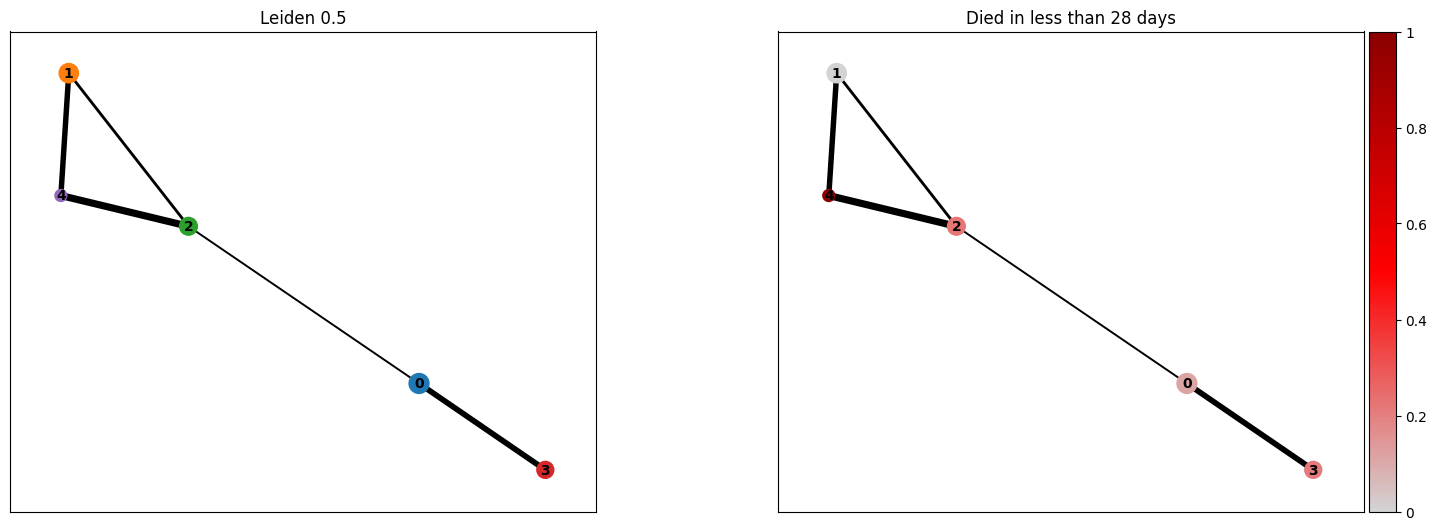

In [35]:
ep.pp.simple_impute(adata)
ep.pp.log_norm(adata, offset=1)
ep.pp.neighbors(adata)
ep.tl.leiden(adata, resolution=0.5, key_added="leiden_0_5")
ep.tl.paga(adata, groups="leiden_0_5")
ep.pl.paga(
    adata,
    color=["leiden_0_5", "day_28_flg"],
    cmap=ep.pl.Colormaps.grey_red.value,
    title=["Leiden 0.5", "Died in less than 28 days"],
    show=False,
)

plt.gcf().set_size_inches(16, 6)
plt.gcf().subplots_adjust(left=0.2, right=0.8, bottom=0.2, top=0.8)

plt.gcf().savefig(f"{_TEST_IMAGE_PATH}/draw_graph1_expected.png", dpi=80)

Package 'fa2-modified' is not installed, falling back to layout 'fr'.To use the faster and better ForceAtlas2 layout, install package 'fa2-modified' (`pip install fa2-modified`).


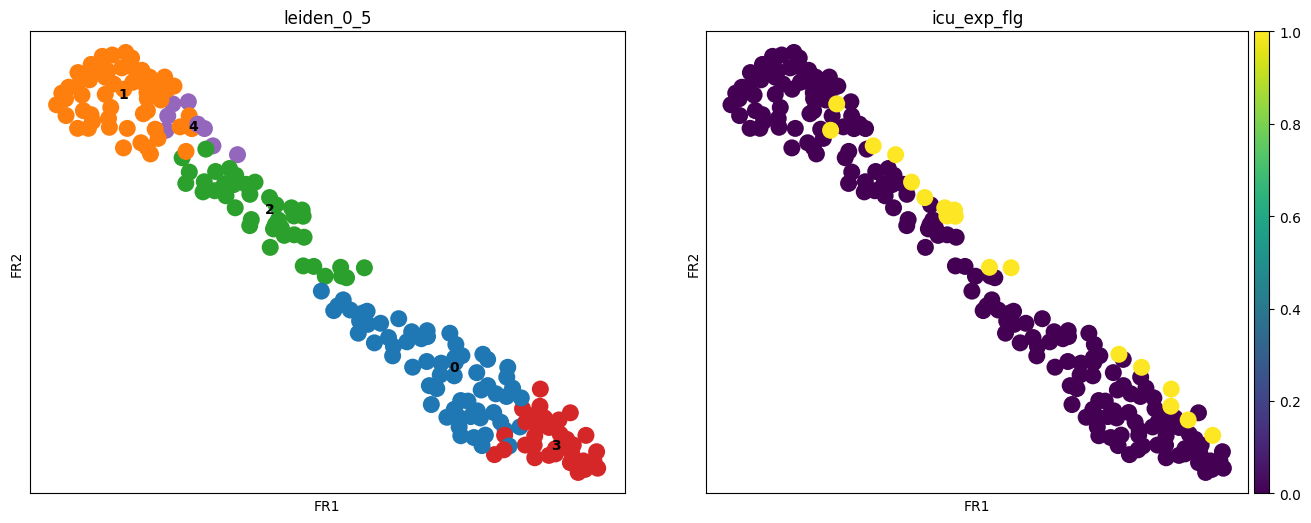

In [36]:
ep.tl.draw_graph(adata, init_pos="paga")
ep.pl.draw_graph(adata, color=["leiden_0_5", "icu_exp_flg"], legend_loc="on data", show=False)
plt.gcf().set_size_inches(16, 6)
plt.gcf().subplots_adjust(left=0.2, right=0.8, bottom=0.2, top=0.8)

plt.gcf().savefig(f"{_TEST_IMAGE_PATH}/draw_graph2_expected.png", dpi=80)